# Colocalization Test

**Created**: 30 November 2021

## Environment

In [1]:
rm(list=ls())

library(tidyverse)
library(data.table)
library(RColorBrewer)
library(cowplot)
library(coloc)
library(susieR)

setwd("~/eQTL_pQTL_Characterization/")

source("01_Colocalization/scripts/utils/ggplot_theme.R")

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


This is coloc version 5.1.1



## Load Data

In [10]:
cis.esnps <- read.table("/nfs/users/nfs_n/nm18/gains_team282/eqtl/cisresults/eigenMT/ciseqtl_eigenMT_corrected.txt") %>%
    dplyr::filter(Sig)

In [28]:
head(cis.esnps, 40)

,snps,gene,statistic,pvalue,beta,se,chr,SNPpos,TSS,BF,TESTS,BF.FDR,Sig,threshold
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<lgl>,<dbl>
22,rs3131972,ENSG00000237491,5.643405,2.400875e-08,0.07174216,0.012712570,1,817341,778747,7.058573e-06,294,1.993414e-05,TRUE,9.170798e-05
23,rs3131972,ENSG00000230092,4.756587,2.329109e-06,0.06239499,0.013117600,1,817341,817712,6.917454e-04,297,1.593483e-03,TRUE,9.078164e-05
25,rs3131972,ENSG00000225880,6.292961,5.949542e-10,0.10016770,0.015917420,1,817341,827522,1.767014e-07,297,5.668498e-07,TRUE,9.078164e-05
28,rs2272757,ENSG00000188976,-7.026045,4.904859e-12,-0.05107767,0.007269761,1,946247,959309,1.545031e-09,315,5.762103e-09,TRUE,8.559411e-05
29,rs13303327,ENSG00000187961,-7.175012,1.845538e-12,-0.13519920,0.018843060,1,960326,960584,5.813445e-10,315,2.228468e-09,TRUE,8.559411e-05
30,rs13303056,ENSG00000187583,-9.081031,1.922802e-18,-0.29633770,0.032632610,1,953778,966482,6.056826e-16,315,3.262796e-15,TRUE,8.559411e-05
31,rs13303033,ENSG00000272512,-5.582390,3.757936e-08,-0.05735337,0.010273980,1,979560,998051,1.187508e-05,316,3.283914e-05,TRUE,8.532325e-05
32,rs3128117,ENSG00000188290,6.452971,2.145482e-10,0.24402970,0.037816650,1,1009184,1000172,6.779723e-08,316,2.243269e-07,TRUE,8.532325e-05
33,rs2341365,ENSG00000187608,-8.972768,4.874800e-18,-0.74852330,0.083421670,1,1013312,1001138,1.540437e-15,316,8.092329e-15,TRUE,8.532325e-05


In [2]:
cis.eqtl <- readRDS("~/gains_team282/eqtl/cisresults/ciseqtl_all.rds")

In [4]:
head(cis.eqtl)

snps,gene,statistic,pvalue,beta,se,chr,SNPpos,TSS,threshold
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
rs114383479,ENSG00000000457,-0.06041776,0.9518546,-0.001449258,0.02398729,1,168894411,169894267,3.879445e-05
rs4656623,ENSG00000000457,-0.27193507,0.7856788,-0.003581294,0.01316967,1,168894562,169894267,3.879445e-05
rs74123028,ENSG00000000457,-0.33215439,0.7398440,-0.010030780,0.03019915,1,168894650,169894267,3.879445e-05
rs74123029,ENSG00000000457,-0.33215439,0.7398440,-0.010030780,0.03019915,1,168894789,169894267,3.879445e-05
rs74123030,ENSG00000000457,-0.33215439,0.7398440,-0.010030780,0.03019915,1,168894934,169894267,3.879445e-05
rs74123031,ENSG00000000457,-0.33215439,0.7398440,-0.010030780,0.03019915,1,168894958,169894267,3.879445e-05


In [3]:
gene.exp <- read.table("/lustre/scratch119/humgen/projects/gains_team282/eqtl/data/logcpm_864_20412_hla.txt")

In [5]:
head(gene.exp)

,UK02270173_3,UK15130120_3,UK58000006_3,UK47010004_3,UK42020088_5,UK47490007_3,UK02770164_3,UK02770164_5,UK02630151_3,UK42150107_1,⋯,UK59070043_3,UK59070043_5,UK02510223_3,UK02XX0336_5,UK29090086_3,UK02XX0335_1,UK02XX0334_3,UK01210130_3,UK01210130_5,UK01380125_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000230521,0.6644339,0.58271604,0.4046756,0.20905157,0.2211571,0.4288519,0.5133516,0.57768877,0.6990766,0.3812037,⋯,0.3823184,0.5423684,0.86762630,0.73833461,0.6461583,0.1227063,0.9621386,0.65838459,1.03561474,0.4457301
ENSG00000225864,0.9817872,0.43879936,0.6022344,0.92340489,0.2211571,1.1450686,0.1921362,0.57768877,0.1974851,1.2290495,⋯,0.6842527,0.8539227,0.91886777,0.12581620,0.5511865,0.4384007,0.5465139,0.40803066,0.46899151,0.3544115
ENSG00000227766,1.2117156,0.30682669,0.6625010,0.79963286,0.6445686,0.3130290,0.1183231,0.16750450,0.1505900,1.0533199,⋯,0.4901384,0.4340781,0.37504164,0.04316943,0.6151905,0.3406488,0.3147798,0.43511377,0.17382742,0.1157514
ENSG00000237669,0.6420763,0.69256830,0.9792012,0.69929584,0.3765156,1.0756817,0.8912050,0.60129641,0.8534668,1.0533199,⋯,1.0790156,0.6102946,1.03953331,0.97965846,0.7061683,0.7489857,0.7919934,0.85168813,0.69120049,1.0798771
ENSG00000271581,2.4744895,1.33153140,1.8310464,2.47531701,1.8812042,2.0531366,0.5972544,1.00686213,1.2811361,2.4244938,⋯,2.4728831,1.5338898,1.59080138,0.62923925,1.2804253,1.4727511,1.2187650,1.46471386,1.44139443,1.1896250
ENSG00000285647,0.0000000,0.03379072,0.0000000,0.05517067,0.6748270,0.0000000,0.0000000,0.03509293,0.6990766,1.6556266,⋯,3.4117627,2.4012963,0.04682116,0.00000000,0.0000000,0.4695662,0.3762952,0.07078527,0.07206309,0.4159282


In [8]:
finemap.snps <- lapply(1:22, function(chr) {
    fread(paste0("/nfs/users/nfs_n/nm18/gains_team282/nikhil/colocalization/cis_eqtl/fine_mapping/FINEMAP/chr", chr, "_credible_sets.tsv"), sep="\t", header=TRUE) %>%
        as.data.frame() %>%
        dplyr::group_by(Gene) %>%
        dplyr::filter(Post_Prob_k == max(Post_Prob_k))
}) %>% do.call(rbind, .) %>%
    as.data.frame()

In [9]:
head(finemap.snps)

,Gene,k,Post_Prob_k,Credibility_Set,Credibility_Set_Min_LD,Credibility_Set_Mean_LD,Credibility_Set_Median_LD,SNP,Prob_SNP_in_CS
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs10753794,0.0998957
2,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs10919236,0.0998957
3,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs10919237,0.0770358
4,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs12404614,0.0770358
5,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs6683782,0.0770358
6,ENSG00000000457,2,0.695347,1,0.949691,0.991513,0.996879,rs6701718,0.0770358


## Test Colocalization at Locus

When I used standard `COLOC` without SuSiE, the best colocalization was at the *ITIH4* locus (ENSG00000055955). I will check for colocalization here using the LD matrix and SuSiE.

In [37]:
eqtl.1 <- "ENSG00000215914"
eqtl.2 <- "ENSG00000268575"

In [55]:
credibility.set <- finemap.snps %>% dplyr::filter(Gene == eqtl.2, Credibility_Set == 2)

credibility.set <- credibility.set$SNP

In [56]:
eqtl.1.data <- cis.eqtl %>%
    dplyr::filter(gene == eqtl.1) %>%
    dplyr::filter(snps %in% credibility.set) %>%
    dplyr::mutate(varbeta=se^2) %>%
    dplyr::select(beta, varbeta, snp=snps, position=SNPpos) %>%
    as.list()
eqtl.1.data[["type"]] = "quant"
eqtl.1.data[["sdY"]] = sd(gene.exp[eqtl.1,])

In [57]:
str(eqtl.1.data)

List of 6
 $ beta    : num [1:39] -0.0119 -0.0119 -0.0119 -0.0183 -0.0119 ...
 $ varbeta : num [1:39] 0.000613 0.000612 0.000612 0.000613 0.000612 ...
 $ snp     : chr [1:39] "rs876029" "rs17162855" "rs35270315" "rs5021859" ...
 $ position: int [1:39] 1764135 1764392 1764895 1765220 1767368 1774334 1774697 1812038 1814717 1821516 ...
 $ type    : chr "quant"
 $ sdY     : num 0.272


In [58]:
eqtl.2.data <- cis.eqtl %>%
    dplyr::filter(gene == eqtl.2) %>%
    dplyr::mutate(varbeta=se^2) %>%
    dplyr::select(beta, varbeta, snp=snps, position=SNPpos) %>%
    as.list()
eqtl.2.data[["type"]] = "quant"
eqtl.2.data[["sdY"]] = sd(gene.exp[eqtl.2,])

In [59]:
str(eqtl.2.data)

List of 6
 $ beta    : num [1:1335] 0.0115 -0.0449 -0.0449 -0.0416 -0.0414 ...
 $ varbeta : num [1:1335] 0.000724 0.00063 0.00063 0.000621 0.000623 ...
 $ snp     : chr [1:1335] "rs3131972" "rs28593608" "rs28385272" "rs4422949" ...
 $ position: int [1:1335] 817341 898547 898818 899548 899619 901149 901544 902277 903007 903175 ...
 $ type    : chr "quant"
 $ sdY     : num 0.563


In [60]:
coloc.res <- coloc.abf(dataset1=eqtl.1.data, dataset2=eqtl.2.data)

Warning message in check_dataset(d = dataset1, 1):
“minimum p value is: 0.46051
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.95e-01  2.35e-03  2.80e-03  6.44e-06  1.70e-04 
[1] "PP abf for shared variant: 0.017%"


Results fail decision rule H4 > 0.7



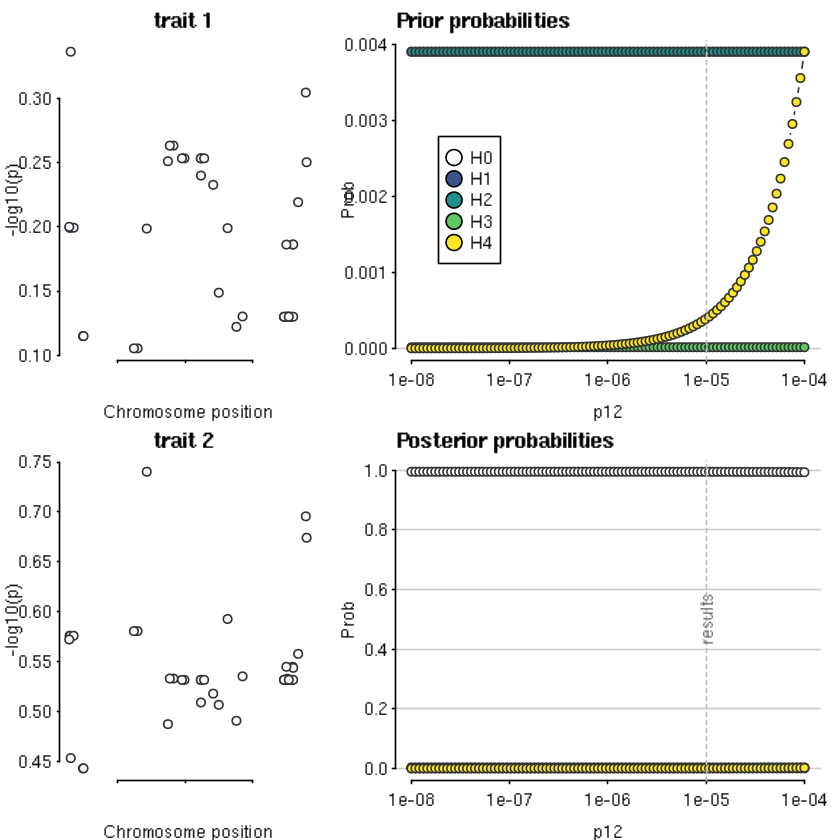

In [61]:
sensitivity(coloc.res, "H4 > 0.7")